# Classification


### 1. Overview

- deck: cabin where they were found
- embarked: where they embarked

#### **Simple rules for classification algorithms**
1. Clean data
2. Transformation of categorical variables:
    - Nominal: Applies one-hot encoding.
    - Ordinal: Converts to numbers keeping the order.
    - Boolean: Converts to 0 and 1.
3. Feature scaling 
    - Scale numeric variables (if needed)
4. Dataset division
    - Train and test
5. Model selection
    - Test several models
6. Model evaluation
    -  Metrics like presicion, confussion matrix, F1-score, etc...
7. Optimization
    - Hyperparameters adjustement


### 2. Importing libraries and reading DataSet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic = sns.load_dataset('titanic')

### 3. Data Preprocessing and Visualization

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Classification algorithms cannot work directly with text


In [5]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Fill null values and drop deck because there are only like 15% of the total samples 

In [6]:
titanic.drop(['deck'], axis=1, inplace=True)
titanic['embark_town'] = titanic['embark_town'].fillna(titanic["embark_town"].mode()[0])
titanic['age'] = titanic['age'].fillna(titanic["age"].mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic["embarked"].mode()[0])

Also, we saw that there are redundancy in the gender and if survived 

In [7]:
titanic.drop(['who', 'adult_male', 'survived'], axis=1, inplace=True)

To make the code more clear

In [8]:
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'embark_town'], drop_first=True)

adult_male, who and sex are mean the same so we only need one

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   pclass                   891 non-null    int64   
 1   age                      891 non-null    float64 
 2   sibsp                    891 non-null    int64   
 3   parch                    891 non-null    int64   
 4   fare                     891 non-null    float64 
 5   class                    891 non-null    category
 6   alive                    891 non-null    object  
 7   alone                    891 non-null    bool    
 8   sex_male                 891 non-null    bool    
 9   embarked_Q               891 non-null    bool    
 10  embarked_S               891 non-null    bool    
 11  embark_town_Queenstown   891 non-null    bool    
 12  embark_town_Southampton  891 non-null    bool    
dtypes: bool(6), category(1), float64(2), int64(3), object(1)
memory u

In [10]:
titanic.head()

,pclass,age,sibsp,parch,fare,class,alive,alone,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,Third,no,False,True,False,True,False,True
1,1,38.0,1,0,71.2833,First,yes,False,False,False,False,False,False
2,3,26.0,0,0,7.9250,Third,yes,True,False,False,True,False,True
3,1,35.0,1,0,53.1000,First,yes,False,False,False,True,False,True
4,3,35.0,0,0,8.0500,Third,no,True,True,False,True,False,True


In [11]:
titanic.isnull().sum()

pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
class                      0
alive                      0
alone                      0
sex_male                   0
embarked_Q                 0
embarked_S                 0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [12]:
titanic.head()

,pclass,age,sibsp,parch,fare,class,alive,alone,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,Third,no,False,True,False,True,False,True
1,1,38.0,1,0,71.2833,First,yes,False,False,False,False,False,False
2,3,26.0,0,0,7.9250,Third,yes,True,False,False,True,False,True
3,1,35.0,1,0,53.1000,First,yes,False,False,False,True,False,True
4,3,35.0,0,0,8.0500,Third,no,True,True,False,True,False,True


Lets check our categorical variables

In [13]:
# find categorical variables
categorical = [var for var in titanic.columns if titanic[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['alive']


In [14]:
titanic['alive'] = titanic['alive'].map({'yes': 1, 'no': 0})
titanic['class'] = titanic['class'].map({'First':1, 'Second': 2, 'Third':3})

In [15]:
titanic.head()

,pclass,age,sibsp,parch,fare,class,alive,alone,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,3,0,False,True,False,True,False,True
1,1,38.0,1,0,71.2833,1,1,False,False,False,False,False,False
2,3,26.0,0,0,7.9250,3,1,True,False,False,True,False,True
3,1,35.0,1,0,53.1000,1,1,False,False,False,True,False,True
4,3,35.0,0,0,8.0500,3,0,True,True,False,True,False,True


Now scale some variables

In [16]:
titanic.shape

(891, 13)

In [17]:
X = titanic.drop(['alive'], axis=1)
y = titanic[['alive']]

In [18]:
print(y.dtypes)
print(y.shape)

alive    int64
dtype: object
(891, 1)


In [19]:
y = np.array(y).flatten()
y.shape

(891,)

#### Ready to work!!!!

### 4. Classification models


#### **Logistic Regression**
Is used to predict the probabilty of an instance to belong to a specific class.

**Logistic function equation (sigmoid):**

The logistic regression uses a sigmoid function to map the predictions between 0 and 1:
$$
P(y=1|X) = \frac{1}{1+\exp^{-(b_nX_n)}}
$$
where:
- $P(y=1|X)$: Probabilty of the instance to be of the class 1
- $X_n$: Input features
- $b_n$: Model coefficients
- $e$: Logaritmic natural basis 

NOTE: Used fot binary classification but can be extended to multiclass clasification like (one-vs-rest or Softmax) view:

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       134
           1       0.76      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



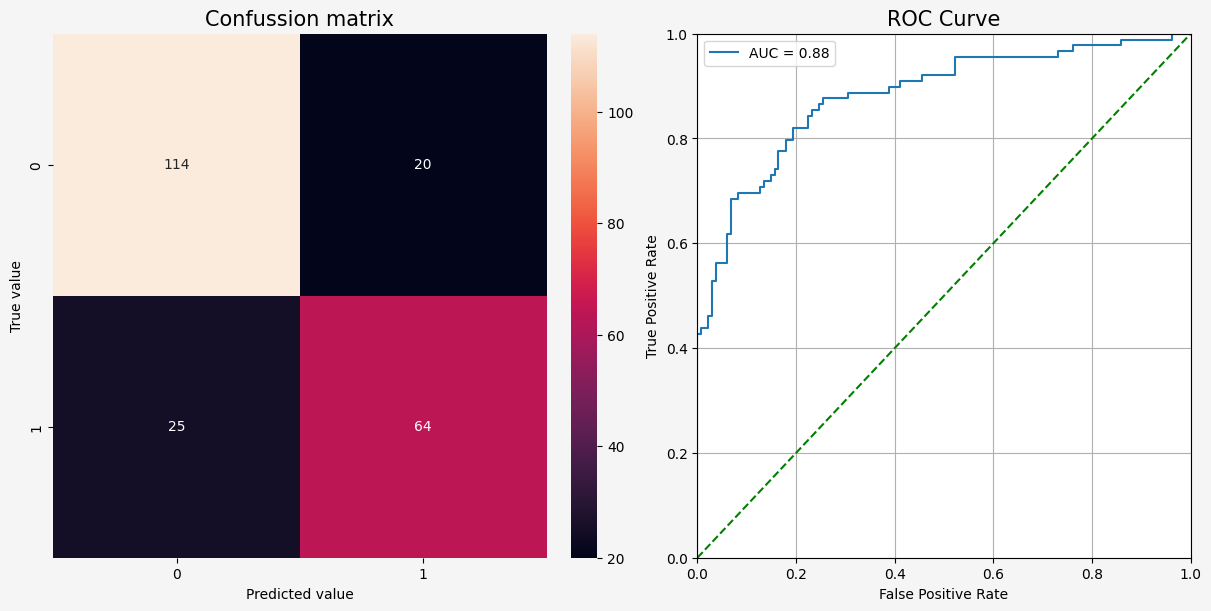

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

model_log = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2')
)
# 1. train the pipeline
model_log.fit(X_train, y_train)
# 2. predict in the sets of train and test
y_pred = model_log.predict(X_test)
# 3. numeric evaluation accuracy, precision, recall, f1_score
print(classification_report(y_test, y_pred)) # precision 0: sensitivity
# 4. graph evaluation                        # precision 1: specificity
fig, axs = plt.subplots(1, 2, figsize=(12, 6), layout ='constrained')
fig.patch.set_facecolor('whitesmoke')
def cm_log(ax, fontsize = 14):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted value')
    ax.set_ylabel('True value')
    ax.set_title('Confussion matrix', fontsize=fontsize+1)
def curve_log(ax, fontsize = 14):
    y_pred_proba = model_log.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    ax.plot(fpr, tpr, label =f'AUC = {auc:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color = 'green')
    ax.grid('-')
    ax.set_xlim(0, 1)  # Límites del eje x
    ax.set_ylim(0, 1)  # Límites del eje y
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title('ROC Curve', fontsize=fontsize+1)
    ax.legend()
cm_log(axs[0], fontsize=14)
curve_log(axs[1], fontsize = 14)


ROC curve and AUC are usually used to size the perfomance of all thresholds, for binary models.



#### **Decision Tree**
Decision trees divides the space of features in regions based in decision rules. Recursively split data until a stopping criterion is reached. 


**Node division**

At each node, the tree selects a feature and threshold that maximizes the **purity** of the subnodes. Common metrics fot measuring the purity are:

1. **Entropy**:
$$
H(S) = -\sum_{i=1}^{C}p_i\log_2(p_i)
$$
 - $H(S)$: Set entropy $S$
 - $p_i$: Proportion of instances of class $i$ on $S$

2. **Gini Impurity**:
$$
G(S)=1-\sum_{i=1}^{C}p_i^{2}
$$
 - $G(S)$: Gini impurity of set S

 NOTE: Susceptible to overfitting,

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



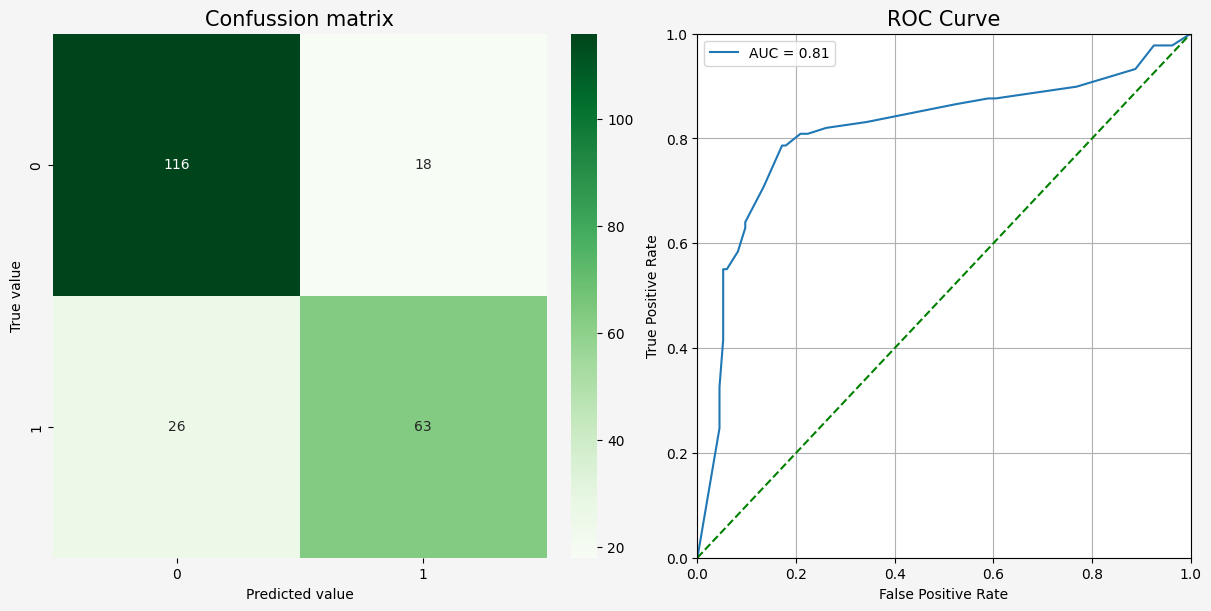

In [22]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

model_dt = DecisionTreeClassifier(criterion='gini', max_depth=7,
                                  min_samples_split=2, min_samples_leaf=5,
                                  max_features='log2')

# 1. train the pipeline
model_dt.fit(X_train, y_train)
# 2. predict in the sets of train and test
y_pred = model_dt.predict(X_test)
# 3. numeric evaluation accuracy, presicion, recall, f1_score
print(classification_report(y_test, y_pred))
# 4. graph evaluation
fig, axs = plt.subplots(1, 2, figsize=(12, 6), layout ='constrained')
fig.patch.set_facecolor('whitesmoke')
def cm_dt(ax, fontsize = 14):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Greens')
    ax.set_xlabel('Predicted value')
    ax.set_ylabel('True value')
    ax.set_title('Confussion matrix', fontsize=fontsize+1)
def curve_dt(ax, fontsize = 14):
    y_pred_proba = model_dt.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    ax.plot(fpr, tpr, label =f'AUC = {auc:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color = 'green')
    ax.grid('-')
    ax.set_xlim(0, 1)  # Límites del eje x
    ax.set_ylim(0, 1)  # Límites del eje y
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title('ROC Curve', fontsize=fontsize+1)
    ax.legend()
cm_dt(axs[0], fontsize=14)
curve_dt(axs[1], fontsize = 14)

Precision (sensitivity):
$$
\frac{True\; Positives}{True\; Positives + False \;Positives}
$$
Precision (specificity):
$$
\frac{False\; Positives}{False\; Positives + True \;Negatives}
$$
ROC (Receiver Operator Characteristic), provides a simple way to summarize where should the threshold be.
$$
True\;Positive\;Rate =Sensitivity \\[5mm]
False\;Positive\;Rate =1-Specificity
$$
AUC (Area Under the Curve)

In [39]:
columns = X.columns

|--- pclass <= 2.50
|   |--- parch <= 0.50
|   |   |--- pclass <= 1.50
|   |   |   |--- fare <= 52.55
|   |   |   |   |--- sex_male <= 0.50
|   |   |   |   |   |--- weights: [1.00, 8.00] class: 1
|   |   |   |   |--- sex_male >  0.50
|   |   |   |   |   |--- fare <= 30.75
|   |   |   |   |   |   |--- fare <= 26.14
|   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |--- fare >  26.14
|   |   |   |   |   |   |   |--- weights: [12.00, 13.00] class: 1
|   |   |   |   |   |--- fare >  30.75
|   |   |   |   |   |   |--- weights: [15.00, 1.00] class: 0
|   |   |   |--- fare >  52.55
|   |   |   |   |--- embarked_S <= 0.50
|   |   |   |   |   |--- age <= 23.50
|   |   |   |   |   |   |--- weights: [2.00, 3.00] class: 1
|   |   |   |   |   |--- age >  23.50
|   |   |   |   |   |   |--- age <= 27.50
|   |   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |   |--- age >  27.50
|   |   |   |   |   |   |   |--- weights: [5.00, 15.00] 

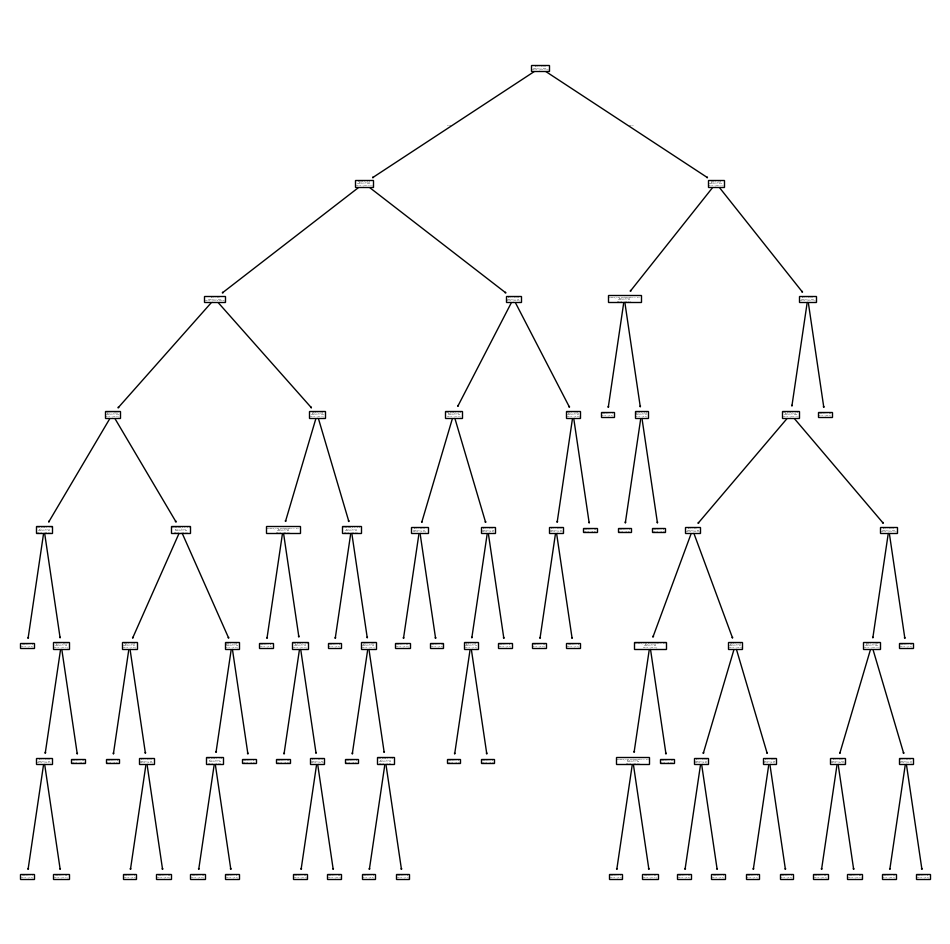

In [42]:
from sklearn.tree import export_text, plot_tree


ax = plt.subplots(figsize =(12, 12))[1]
plot_tree(model_dt,
          feature_names=columns,
          ax=ax)

print(export_text(model_dt,
                  feature_names=columns,
                  show_weights=True))

### 5. Conclusion
Decision tree had a better sensitivity for predict survivors found in the Titanic dataset that Logistic Regression which have .76 for survivors meanwhile Decision Tree had .86, is a 10% difference.